# Spare-it DS701 Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# 1. Client Overview and Problem Statement

## 1.1 About Spare-it


> **Spare-it: Pioneering Sustainable Waste Management with Cutting-Edge Technology**
- Spare-it is a leading sustainable waste management company, harnessing technology and environmental stewardship to help businesses, universities, and office owners reduce their environmental impact, save costs, and enhance efficiency. Its core strategy involves a robust technological framework, combining advanced hardware and software, strategic office design, and gamification to develop comprehensive waste management programs. These initiatives not only boost recycling but also aim to significantly cut waste production.
- The company’s mission centers on being a sustainability catalyst, driven by the belief that environmental awareness and behavior change require solid data intelligence. Spare-it provides real-time data on various waste management aspects, including general waste, recycling, and resource utilization like energy and water. This approach empowers organizations to make informed decisions and adopt effective waste reduction strategies.
- Spare-it's innovative approach, particularly through gamification, fosters a culture of environmental responsibility among employees and students, making waste management an engaging and meaningful endeavor. Ultimately, Spare-it positions itself as more than a waste management company; it's a collaborative partner in shaping a sustainable future, one step at a time.

## 1.2 Problem Statement

### **Task 1 :** Comparative Analysis of Manual (Fullness) Versus Scale Weight Measurements

> **Overview:** This detailed comparative analysis aims to meticulously examine the differences between manual weight measurements conducted by students and the measurements obtained from scales, as recorded in our dataset. The objective is to identify and analyze any notable discrepancies between these two methods. Additionally, this analysis will explore the potential causes of these variances, providing insights into the reliability and accuracy of manual versus scale measurements. This investigation is crucial for understanding the effectiveness of manual weight estimation techniques and the precision of scale measurements, ultimately contributing to the enhancement of data collection methods in weight measurement studies.

### **Task 2:** Bin Weight Anomaly Detection
> **Overview:** This task involves a comprehensive analysis of the noise and signal ratios in weight measurements from our extensive dataset of 1000+ scales. The primary focus is on understanding the reliability and accuracy of these scales by distinguishing between the actual weight signal and the noise in the data. This process is crucial for enhancing the precision of weight measurements in sustainable waste management practices

# 2. Initial Exploratory Data Analysis

## 2.1 Data Overview

> We have two datasets:
- scale_records: This dataset comprises automated scale measurements of waste bins. It includes the weight data along with error codes and other metadata
- fullness_assessments: This dataset represents manual assessments of waste bin fullness. Each record includes details about the bin, its location, and the assessment specifics

In [2]:
fullness_assessments = pd.read_csv("/Users/ishan/Downloads/Fullness Assessments up to Nov 20th.csv",parse_dates=['date'])
scale_records = pd.read_csv("/Users/ishan/Downloads/Spare-it V5 scale records Jan 1 to Nov 20 2023.csv",parse_dates=['createdat','updatedat'])

In [140]:
scale_records_test = pd.read_csv("/Users/ishan/Downloads/Spare-it V5 scale records Jan 1 to Nov 20 2023.csv")

In [3]:
print(fullness_assessments.shape)
print(fullness_assessments.dtypes)
fullness_assessments.head(5)

(2647, 12)
wca            object
bin            object
date           object
creator        object
account        object
building       object
floor          object
stationName    object
binName        object
category       object
assessment     object
fullness        int64
dtype: object


,wca,bin,date,creator,account,building,floor,stationName,binName,category,assessment,fullness
0,b5ccb2c4-ff89-4e84-b7af-70b5786fac23,a6241564-5843-4d99-87d5-d7e90127ff1d,2023-09-13 14:17:21-04:00,Lizzie Allen,BU CCDS,Center for Computing & Data Sciences,16,CCBU16A,CCBU16AC,Compost,Undefined,10
1,b5ccb2c4-ff89-4e84-b7af-70b5786fac23,d65ef7bf-3f7c-4540-b7d0-9d29d6462d93,2023-09-13 14:17:21-04:00,Lizzie Allen,BU CCDS,Center for Computing & Data Sciences,16,CCBU16A,CCBU16AR,Mixed Recycling,Undefined,20
2,b5ccb2c4-ff89-4e84-b7af-70b5786fac23,8be0c432-00b4-41ff-976b-5adf1e7670d7,2023-09-13 14:17:21-04:00,Lizzie Allen,BU CCDS,Center for Computing & Data Sciences,16,CCBU16A,CCBU16AT,Trash,Undefined,40
3,b5f3a955-3dd2-4b7d-9515-260f304eb6db,40b01406-13ea-4be3-8dda-849d6ad614e6,2023-09-13 14:18:08-04:00,Lizzie Allen,BU CCDS,Center for Computing & Data Sciences,16,CCBU16B,CCBU16BC,Compost,Undefined,10
4,b5f3a955-3dd2-4b7d-9515-260f304eb6db,602d019f-890c-48c5-8c9f-57cde524bdb5,2023-09-13 14:18:08-04:00,Lizzie Allen,BU CCDS,Center for Computing & Data Sciences,16,CCBU16B,CCBU16BR,Mixed Recycling,Undefined,10


In [4]:
print(scale_records.shape)
print(scale_records.dtypes)
scale_records.head(5)


(17562111, 12)
createdat     datetime64[ns]
iotid                 object
hide                    bool
bin                   object
errorcode             object
weight               float64
battery              float64
updatedat     datetime64[ns]
weightdiff           float64
year                   int64
month                  int64
day                    int64
dtype: object


,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day
0,2023-01-07 05:21:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19850.461585,2536.354620,2023-01-07 05:21:00,NaN,2023,1,7
1,2023-01-07 06:06:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19847.409781,2536.049439,2023-01-07 06:06:00,NaN,2023,1,7
2,2023-01-07 06:12:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19847.409781,2534.981308,2023-01-07 06:12:00,NaN,2023,1,7
3,2023-01-07 06:19:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19844.357977,2534.828717,2023-01-07 06:19:00,NaN,2023,1,7
4,2023-01-07 06:24:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19847.409781,2535.439078,2023-01-07 06:24:00,NaN,2023,1,7


## 2.2 Data Cleaning

### 2.2.1 Missing Values

In [5]:
print(fullness_assessments.isna().sum())
print("************************")
print(scale_records.isna().sum())

wca            0
bin            0
date           0
creator        0
account        0
building       0
floor          0
stationName    0
binName        0
category       0
assessment     0
fullness       0
dtype: int64
************************


createdat            0
iotid                0
hide                 0
bin                  0
errorcode            0
weight               0
battery              0
updatedat            0
weightdiff    17562111
year                 0
month                0
day                  0
dtype: int64


In [6]:
scale_records[scale_records['weightdiff'].isna()].head(10)

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day
0,2023-01-07 05:21:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19850.461585,2536.354620,2023-01-07 05:21:00,NaN,2023,1,7
1,2023-01-07 06:06:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19847.409781,2536.049439,2023-01-07 06:06:00,NaN,2023,1,7
2,2023-01-07 06:12:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19847.409781,2534.981308,2023-01-07 06:12:00,NaN,2023,1,7
3,2023-01-07 06:19:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19844.357977,2534.828717,2023-01-07 06:19:00,NaN,2023,1,7
4,2023-01-07 06:24:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19847.409781,2535.439078,2023-01-07 06:24:00,NaN,2023,1,7
5,2023-01-07 06:30:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19847.409781,2535.744259,2023-01-07 06:30:00,NaN,2023,1,7
6,2023-01-07 06:35:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19844.357977,2535.896849,2023-01-07 06:35:00,NaN,2023,1,7
7,2023-01-07 06:40:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19844.357977,2535.439078,2023-01-07 06:40:00,NaN,2023,1,7
8,2023-01-07 06:46:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19844.357977,2535.286488,2023-01-07 06:46:00,NaN,2023,1,7
9,2023-01-07 06:53:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,18312.352178,2533.455406,2023-01-07 06:53:00,NaN,2023,1,7


There are no missing values in both files. weightdiff column in the scale_records file has missing values, but this is due to the records having the same weight as seen above.

### 2.2.2 Duplicate records

In [128]:
scale_records.shape

(17562111, 12)

In [7]:
duplicates = scale_records[scale_records.duplicated()]
duplicates.shape # 11.6M Duplicates

(0, 12)

In [8]:
scale_records_clean = scale_records.drop_duplicates()
scale_records_clean = scale_records_clean.copy()

In [9]:
scale_records_clean.shape

(17562111, 12)

### 2.2.3 Converting Dates to Datetime

In [10]:
print(fullness_assessments['date'].dtype)
print(scale_records_clean['createdat'].dtype)

object
datetime64[ns]


In [11]:
fullness_assessments.head(2)

,wca,bin,date,creator,account,building,floor,stationName,binName,category,assessment,fullness
0,b5ccb2c4-ff89-4e84-b7af-70b5786fac23,a6241564-5843-4d99-87d5-d7e90127ff1d,2023-09-13 14:17:21-04:00,Lizzie Allen,BU CCDS,Center for Computing & Data Sciences,16,CCBU16A,CCBU16AC,Compost,Undefined,10
1,b5ccb2c4-ff89-4e84-b7af-70b5786fac23,d65ef7bf-3f7c-4540-b7d0-9d29d6462d93,2023-09-13 14:17:21-04:00,Lizzie Allen,BU CCDS,Center for Computing & Data Sciences,16,CCBU16A,CCBU16AR,Mixed Recycling,Undefined,20


In [12]:
fullness_assessments['date'].head(5)

0    2023-09-13 14:17:21-04:00
1    2023-09-13 14:17:21-04:00
2    2023-09-13 14:17:21-04:00
3    2023-09-13 14:18:08-04:00
4    2023-09-13 14:18:08-04:00
Name: date, dtype: object

In [133]:
# Print sample before conversion
print("Before Conversion:")
print("fullness_assessments:", fullness_assessments['date'].iloc[1])
print("scale_records_clean:", scale_records_clean['createdat'].iloc[1])

Before Conversion:
fullness_assessments: 2023-09-13 18:17:00
scale_records_clean: 2023-01-01 00:01:00


In [14]:
# Convert date columns to datetime format
fullness_assessments['date'] = pd.to_datetime(fullness_assessments['date'], utc=True).dt.tz_convert(None).dt.floor('T')

# Convert 'createdat' in scale_records_clean to datetime and truncate to minute
scale_records_clean['createdat'] = pd.to_datetime(scale_records_clean['createdat']).dt.tz_localize(None).dt.floor('T')

In [134]:
# Print sample after conversion
print("\nAfter Conversion:")
print("fullness_assessments:", fullness_assessments['date'].iloc[1])
print("scale_records_clean:", scale_records_clean['createdat'].iloc[1])


After Conversion:
fullness_assessments: 2023-09-13 18:17:00
scale_records_clean: 2023-01-01 00:01:00


In [16]:
scale_records['createdat'].iloc[0]

Timestamp('2023-01-07 05:21:00')

## 2.3 Bin Profiling
- There are 1,188 unique bins on 17 Floors in CDS building
- Categories of bins in a station are Trash, Mixed Recycling, Compost
- Scales can have upto 6 bins under its realm 

In [17]:
unique_bins_count = scale_records_clean['iotid'].nunique()
print(f"There are {unique_bins_count} unique scales.")

unique_bins_count = scale_records_clean['bin'].nunique()
print(f"There are {unique_bins_count} unique bins.")

There are 1218 unique scales.
There are 1298 unique bins.


In [18]:
# Unique bins in scale_records
print(scale_records_clean['bin'].nunique())

# Find total counts for columns
for col in fullness_assessments.columns:
    print(f"Value counts for {col}:\n")
    print(fullness_assessments[col].value_counts())
    print("\n" + "="*50 + "\n")  # Separator for better readability

# Find unique counts for columns
for col in fullness_assessments.columns:
    print(f"Unique counts for {col}:\n")
    print(fullness_assessments[col].nunique())
    print("\n" + "="*50 + "\n")  # Separator for better readability

1298
Value counts for wca:

wca
b5ccb2c4-ff89-4e84-b7af-70b5786fac23    3
0347cb9e-6b44-470d-8455-10697f34e495    3
885caba5-d831-4be5-ad51-469b06e8d025    3
0a1c7f6e-9cc7-419d-b59c-46f4d76ad1e5    3
532851bd-54c6-4b3c-9d8c-8dc7a8565637    3
                                       ..
0ff48beb-9621-4735-a48d-ffdc7484b372    1
06b264b9-5e6f-440a-82ea-de561fb98391    1
b3764451-4200-4a94-a0dd-37c932871bfc    1
7eeb22a3-3956-4deb-8817-d240fd601272    1
31d63c67-f7e1-4c95-bcd4-7c8cc50f1ef2    1
Name: count, Length: 1317, dtype: int64


Value counts for bin:

bin
d65ef7bf-3f7c-4540-b7d0-9d29d6462d93    28
8be0c432-00b4-41ff-976b-5adf1e7670d7    28
8bae2c55-986a-486e-a869-baa128651d95    25
71ed9899-2c2a-4ed2-8463-2143e4cb99d5    25
c77d993f-cc97-4091-abd7-377aa5650772    24
                                        ..
b66147b1-c78c-4951-9795-0de008ff9b6b     1
a00a991c-858d-4765-806e-a97a9003e57d     1
8ee255fd-edb7-4071-90d8-a506f18bac7e     1
6909b79a-21f1-4463-a866-c25d803402ea     1
3659a96

In [19]:
# Group by 'iotid' and count unique 'bin' values for each 'iotid'
unique_bins_per_iotid = scale_records_clean.groupby('iotid')['bin'].nunique()

# Check if each 'iotid' has only one unique 'bin' associated with it
is_one_to_one_mapping = all(unique_bins_per_iotid == 1)

print(unique_bins_per_iotid.sort_values(ascending=False))

iotid
lora-001610    6
lora-000067    5
lora-000732    4
lora-000152    4
lora-000734    4
              ..
lora-000522    1
lora-000523    1
lora-000524    1
lora-000526    1
lora-001866    1
Name: bin, Length: 1218, dtype: int64


In [20]:
# Multiple scales to one bin

bin_iotid_counts = scale_records_clean.groupby('bin')['iotid'].nunique()
bins_with_multiple_iotids = bin_iotid_counts[bin_iotid_counts > 1]
num_bins_with_multiple_iotids = bins_with_multiple_iotids.count()

print(f"There are {num_bins_with_multiple_iotids} bins with multiple scales.")

There are 128 bins with multiple scales.


## 2.4 Error codes
- 99.27% of measurements have no error
-  0.68% of measurements are out of range
- 0.05% of measurements are unstable

In [21]:
# Check unique error codes
print(scale_records_clean['errorcode'].unique())

['NO_ERROR' 'OUT_OF_RANGE' 'UNSTABLE']


In [22]:
print(scale_records_clean['errorcode'].value_counts())
percentage_errors = scale_records_clean['errorcode'].value_counts(normalize=True) * 100
print("************************************************************************************************************************")
print(percentage_errors)

errorcode
NO_ERROR        17446900
OUT_OF_RANGE      106526
UNSTABLE            8685
Name: count, dtype: int64
************************************************************************************************************************
errorcode
NO_ERROR        99.343980
OUT_OF_RANGE     0.606567
UNSTABLE         0.049453
Name: proportion, dtype: float64


In [23]:
print(scale_records['hide'].value_counts())

hide
False    17446771
True       115340
Name: count, dtype: int64


In [24]:
percentage_errors = scale_records_clean['hide'].value_counts(normalize=True) * 100
print("************************************************************************************************************************")
print(percentage_errors)

************************************************************************************************************************
hide
False    99.343245
True      0.656755
Name: proportion, dtype: float64


## 2.5 Plotting one week weight for a sample bin 

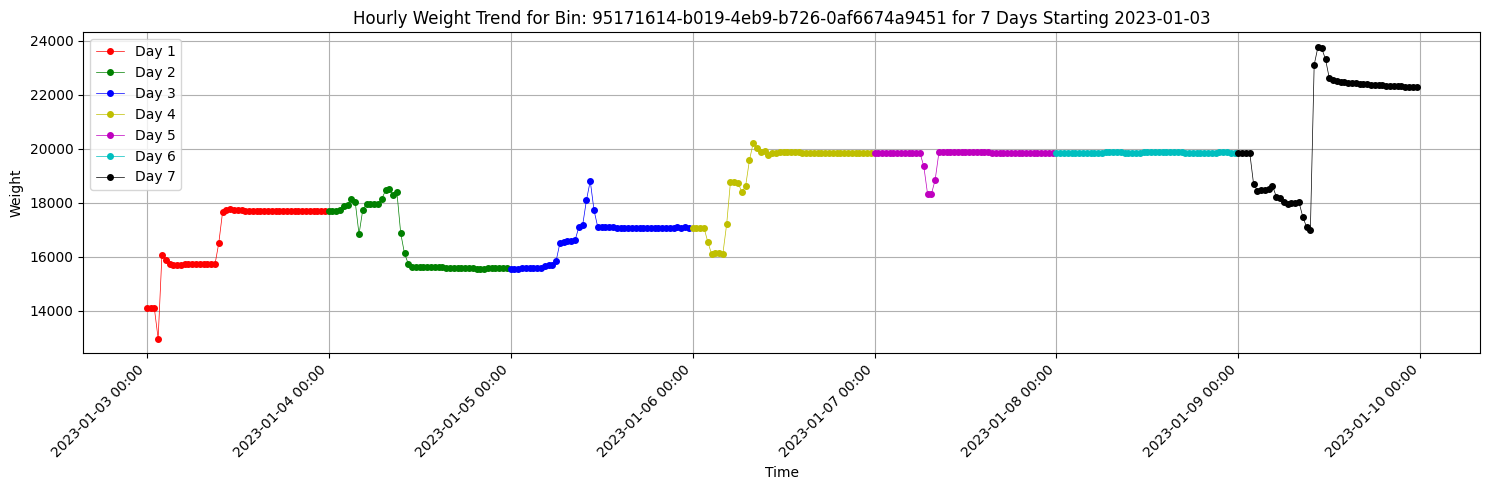

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Select a random bin 
random_bin = scale_records_clean['bin'].iloc[10]

# Define a function to filter and resample records for a given date
def get_daily_records(date):
    next_day = date + pd.Timedelta(days=1)
    one_day_records = scale_records_clean[(scale_records_clean['bin'] == random_bin) & 
                                (scale_records_clean['createdat'] >= date) & 
                                (scale_records_clean['createdat'] < next_day)]
    columns_to_include = ['weight']
    half_hour_intervals = one_day_records.set_index('createdat')[columns_to_include].resample('30T').mean()
    return half_hour_intervals

# Set the start date
start_date = pd.Timestamp('2023-01-03')
all_records = pd.concat([get_daily_records(start_date + pd.Timedelta(days=i)) for i in range(7)])

# Plotting
plt.figure(figsize=(15,5))

colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k']

# Loop through each day and plot separately with different color
for i in range(7):
    daily_records = get_daily_records(start_date + pd.Timedelta(days=i))
    plt.plot(daily_records.index, daily_records['weight'], marker='o', linestyle='-', markersize=4, linewidth=0.5, label=f'Day {i+1}', color=colors[i])

plt.title(f"Hourly Weight Trend for Bin: {random_bin} for 7 Days Starting {start_date.date()}")
plt.xlabel('Time')
plt.ylabel('Weight')

# Formatting for x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45, ha='right')  # 'ha' adjusts the alignment of the datetime values

plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


# 3. Comparative analysis of manual fullness and scale weight measurements

## 3.1 Exploratory Data Analysis for fullness measures

In [26]:
fullness_assessments.head(5)

,wca,bin,date,creator,account,building,floor,stationName,binName,category,assessment,fullness
0,b5ccb2c4-ff89-4e84-b7af-70b5786fac23,a6241564-5843-4d99-87d5-d7e90127ff1d,2023-09-13 18:17:00,Lizzie Allen,BU CCDS,Center for Computing & Data Sciences,16,CCBU16A,CCBU16AC,Compost,Undefined,10
1,b5ccb2c4-ff89-4e84-b7af-70b5786fac23,d65ef7bf-3f7c-4540-b7d0-9d29d6462d93,2023-09-13 18:17:00,Lizzie Allen,BU CCDS,Center for Computing & Data Sciences,16,CCBU16A,CCBU16AR,Mixed Recycling,Undefined,20
2,b5ccb2c4-ff89-4e84-b7af-70b5786fac23,8be0c432-00b4-41ff-976b-5adf1e7670d7,2023-09-13 18:17:00,Lizzie Allen,BU CCDS,Center for Computing & Data Sciences,16,CCBU16A,CCBU16AT,Trash,Undefined,40
3,b5f3a955-3dd2-4b7d-9515-260f304eb6db,40b01406-13ea-4be3-8dda-849d6ad614e6,2023-09-13 18:18:00,Lizzie Allen,BU CCDS,Center for Computing & Data Sciences,16,CCBU16B,CCBU16BC,Compost,Undefined,10
4,b5f3a955-3dd2-4b7d-9515-260f304eb6db,602d019f-890c-48c5-8c9f-57cde524bdb5,2023-09-13 18:18:00,Lizzie Allen,BU CCDS,Center for Computing & Data Sciences,16,CCBU16B,CCBU16BR,Mixed Recycling,Undefined,10


In [27]:
scale_records_clean.head()

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day
0,2023-01-07 05:21:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19850.461585,2536.354620,2023-01-07 05:21:00,NaN,2023,1,7
1,2023-01-07 06:06:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19847.409781,2536.049439,2023-01-07 06:06:00,NaN,2023,1,7
2,2023-01-07 06:12:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19847.409781,2534.981308,2023-01-07 06:12:00,NaN,2023,1,7
3,2023-01-07 06:19:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19844.357977,2534.828717,2023-01-07 06:19:00,NaN,2023,1,7
4,2023-01-07 06:24:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,19847.409781,2535.439078,2023-01-07 06:24:00,NaN,2023,1,7


In [28]:
print(fullness_assessments.shape)
print(scale_records_clean.shape)

(2647, 12)
(17562111, 12)


### Checking if all the bins in fullness assessments are in scale_records

In [29]:
# Get unique bins from fullness_assessments
unique_bins_fullness = set(fullness_assessments['bin'].unique())

# Get unique bins from scale_records_clean
unique_bins_scale_records = set(scale_records_clean['bin'].unique())

# Find the intersection of both sets
common_bins = unique_bins_fullness.intersection(unique_bins_scale_records)

# Count the number of common bins
common_bins_count = len(common_bins)

print(f"There are {common_bins_count} bins in 'fullness_assessments' that are also present in 'scale_records'.")

There are 228 bins in 'fullness_assessments' that are also present in 'scale_records'.


### Merging fullness dataset with scale_records

In [30]:
# Sort the DataFrames by the date column
fullness_assessments.sort_values(by='date', inplace=True)
scale_records_clean.sort_values(by='createdat', inplace=True)

# Perform a nearest merge
merged_data = pd.merge_asof(
    scale_records_clean,
    fullness_assessments[['bin', 'date', 'fullness']],
    left_on='createdat',
    right_on='date',
    by='bin',
    direction='nearest',
    tolerance=pd.Timedelta(minutes=15)
)

# Reset index if needed and inspect the merged data
merged_data.reset_index(drop=True, inplace=True)

In [31]:
merged_data.shape

(17562111, 14)

In [32]:
merged_data.head(5)

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day,date,fullness
0,2023-01-01 00:01:00,lora-000248,False,09b1ece7-5aaa-4c66-a89a-ac6a99bae6ed,NO_ERROR,2754.253452,2633.096818,2023-01-01 00:01:00,NaN,2023,1,1,NaT,NaN
1,2023-01-01 00:01:00,lora-000555,False,f607dcde-923c-4015-ba87-755fd806009d,NO_ERROR,3276.112001,3000.534066,2023-01-01 00:01:00,NaN,2023,1,1,NaT,NaN
2,2023-01-01 00:01:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14097.810330,2615.091173,2023-01-01 00:01:00,NaN,2023,1,1,NaT,NaN
3,2023-01-01 00:01:00,lora-000067,False,ac35373c-9cc0-4223-95a4-e64285725cbf,NO_ERROR,18229.953460,2648.050660,2023-01-01 00:01:00,NaN,2023,1,1,NaT,NaN
4,2023-01-01 00:01:00,lora-000249,False,a3096695-a191-49ac-a87c-4339f0016114,NO_ERROR,4789.806973,3017.166400,2023-01-01 00:01:00,NaN,2023,1,1,NaT,NaN


In [33]:
# Get bin information

# Reduce fullness_assessments to only have one row per 'bin'
unique_fullness_assessments = fullness_assessments.groupby('bin').first().reset_index()

# Perform the left join
merged_data_bins = pd.merge(
    left=merged_data,
    right=unique_fullness_assessments[['building', 'floor', 'stationName', 'binName', 'category', 'bin']],
    how='left',  # Perform a left join
    on='bin'  # Join on 'bin'
)

In [34]:
merged_data = merged_data_bins.copy()

In [35]:
merged_data.shape

(17562111, 19)

### Checking example bin : 5069cf4f-5953-411e-a764-0fad4e7b5354

Here we are checking if the merge was accurate and we can see that **2023-09-13 19:34:00** was correctly matched to **2023-09-13 19:35:00**. 

In [36]:
merged_data[(merged_data['bin']=='5069cf4f-5953-411e-a764-0fad4e7b5354') & (merged_data['fullness'].notnull())]

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day,date,fullness,building,floor,stationName,binName,category
13301531,2023-09-13 19:34:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7286.182956,2880.750744,2023-09-13 19:34:00,NaN,2023,9,13,2023-09-13 19:35:00,10.0,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
14264405,2023-09-29 18:30:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7420.462348,2877.393759,2023-09-29 18:30:00,NaN,2023,9,29,2023-09-29 18:40:00,30.0,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
14621028,2023-10-05 17:21:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7234.302281,2875.410086,2023-10-05 17:21:00,NaN,2023,10,5,2023-10-05 17:21:00,30.0,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
15050001,2023-10-12 18:16:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7679.865721,2871.595331,2023-10-12 18:16:00,NaN,2023,10,12,2023-10-12 18:19:00,10.0,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
15111912,2023-10-13 18:19:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7438.773175,2869.306477,2023-10-13 18:19:00,NaN,2023,10,13,2023-10-13 18:23:00,10.0,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
15484653,2023-10-19 18:41:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7374.685283,2868.848707,2023-10-19 18:41:00,NaN,2023,10,19,2023-10-19 18:53:00,20.0,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
15947057,2023-10-26 19:35:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7481.498436,2868.848707,2023-10-26 19:35:00,NaN,2023,10,26,2023-10-26 19:24:00,50.0,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost


### Filtering out the bins that have fullness values

In [37]:
bins_with_non_null_fullness = merged_data[merged_data['fullness'].notnull()]['bin'].unique()
bins_with_non_null_fullness.shape

(228,)

In [38]:
merged_data_filt = merged_data[merged_data['bin'].isin(bins_with_non_null_fullness)]
merged_data_filt.shape

(3333885, 19)

## 3.2 Computing the baseline for these bins

In [39]:
import peakutils

# Sort the DataFrame by date
merged_data_filt.sort_values(by='createdat', inplace=True)

# Initialize a column for the rolling baseline
merged_data_filt['baseline_rolling'] = None

# Loop through each unique bin
for bin_id in merged_data_filt['bin'].unique():
    # Filter data for the current bin
    bin_data = merged_data_filt[merged_data_filt['bin'] == bin_id]

    # Calculate the baseline for the bin's weight data using peakutils
    baseline_values = peakutils.baseline(bin_data['weight'].values, deg=7)

    # Create a temporary DataFrame with dates and baseline values
    temp_df = pd.DataFrame({'createdat': bin_data['createdat'], 'baseline_peakutils': baseline_values})
    temp_df.set_index('createdat', inplace=True)

    # Calculate the rolling mean over a 30-day window on the baseline values
    temp_df['baseline_rolling'] = temp_df['baseline_peakutils'].rolling('15D').mean()

    # Update the main DataFrame
    merged_data_filt.loc[merged_data_filt['bin'] == bin_id, 'baseline_rolling'] = temp_df['baseline_rolling'].values

In [40]:
merged_data_filt.head(5)

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day,date,fullness,building,floor,stationName,binName,category,baseline_rolling
498404,2023-01-18 14:59:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2049.286641,3161.516747,2023-01-18 14:59:00,NaN,2023,1,18,NaT,NaN,Center for Computing & Data Sciences,16,CCBU16A,CCBU16AT,Trash,1594.648557
498458,2023-01-18 15:00:00,lora-000633,False,8be0c432-00b4-41ff-976b-5adf1e7670d7,NO_ERROR,2046.234836,3159.685664,2023-01-18 15:00:00,NaN,2023,1,18,NaT,NaN,Center for Computing & Data Sciences,16,CCBU16A,CCBU16AT,Trash,1594.776743
498465,2023-01-18 15:00:00,lora-000602,False,d65ef7bf-3f7c-4540-b7d0-9d29d6462d93,NO_ERROR,2012.664988,3176.775769,2023-01-18 15:00:00,NaN,2023,1,18,NaT,NaN,Center for Computing & Data Sciences,16,CCBU16A,CCBU16AR,Mixed Recycling,1900.390585
498469,2023-01-18 15:00:00,lora-000344,False,a6241564-5843-4d99-87d5-d7e90127ff1d,NO_ERROR,1826.504921,3157.701991,2023-01-18 15:00:00,NaN,2023,1,18,NaT,NaN,Center for Computing & Data Sciences,16,CCBU16A,CCBU16AC,Compost,1314.492109
498486,2023-01-18 15:01:00,lora-000602,False,d65ef7bf-3f7c-4540-b7d0-9d29d6462d93,NO_ERROR,2012.664988,3176.165408,2023-01-18 15:01:00,NaN,2023,1,18,NaT,NaN,Center for Computing & Data Sciences,16,CCBU16A,CCBU16AR,Mixed Recycling,1900.202161


In [49]:
merged_data['bin'].head(3)

0    09b1ece7-5aaa-4c66-a89a-ac6a99bae6ed
1    f607dcde-923c-4015-ba87-755fd806009d
2    95171614-b019-4eb9-b726-0af6674a9451
Name: bin, dtype: object

## 3.3 Example Bin Plot for normal bin (with Fullness)

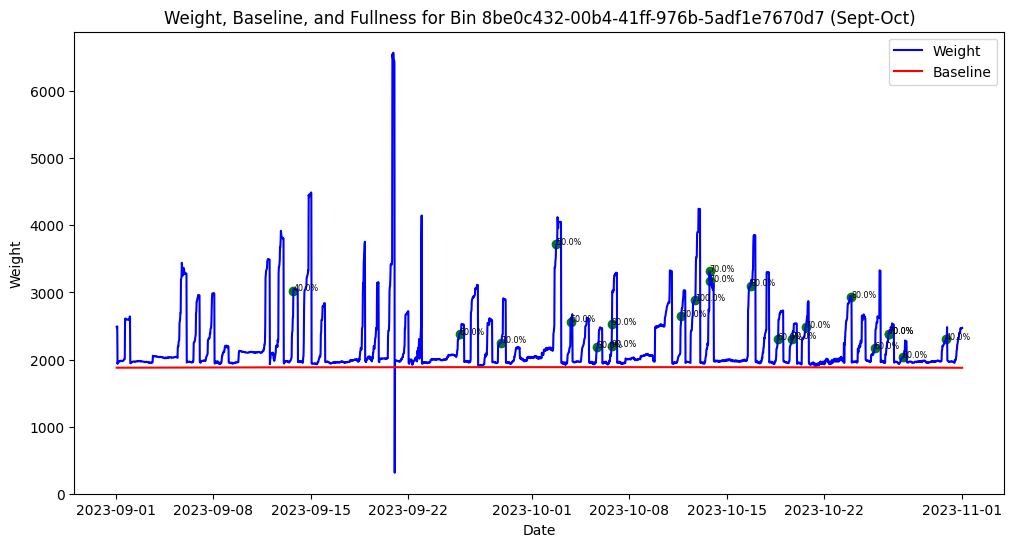

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace 'your_bin_id' with the actual ID of the bin you want to plot
your_bin_id = '8be0c432-00b4-41ff-976b-5adf1e7670d7'

# Filter the DataFrame for the specific bin
specific_bin_data = merged_data_filt[merged_data_filt['bin'] == your_bin_id]

# Convert 'createdat' to datetime and filter for September and October
specific_bin_data['createdat'] = pd.to_datetime(specific_bin_data['createdat'])
specific_bin_data = specific_bin_data.set_index('createdat')
specific_bin_data = specific_bin_data['2023-09':'2023-10'].reset_index()

# Check if the bin has data to plot
if not specific_bin_data.empty:
    plt.figure(figsize=(12, 6))

    # Plotting weight
    plt.plot(specific_bin_data['createdat'], specific_bin_data['weight'], label='Weight', color='blue')

    # Plotting baseline
    plt.plot(specific_bin_data['createdat'], specific_bin_data['baseline_rolling'], label='Baseline', color='red')

    # Marking only non-null fullness values
    for index, row in specific_bin_data.iterrows():
        if not pd.isna(row['fullness']):
            plt.scatter(row['createdat'], row['weight'], color='green')  # Marking fullness on the weight plot
            plt.text(row['createdat'], row['weight'], f'{row["fullness"]}%', horizontalalignment='left', size='xx-small', color='black')

    # Adding title and labels
    plt.title(f'Weight, Baseline, and Fullness for Bin {your_bin_id} (Sept-Oct)')
    plt.xlabel('Date')
    plt.ylabel('Weight')
    plt.legend()

    plt.show()
else:
    print(f"No data available for bin {your_bin_id}")


### Tabular Representation of Example Bin - 1

In [42]:
fullness_assessments[fullness_assessments['bin'] == '8be0c432-00b4-41ff-976b-5adf1e7670d7'][['date', 'fullness']]

,date,fullness
2,2023-09-13 18:17:00,40
168,2023-09-25 18:07:00,60
279,2023-09-28 18:06:00,10
429,2023-10-02 17:20:00,50
462,2023-10-03 17:55:00,60
605,2023-10-05 16:32:00,30
750,2023-10-06 17:24:00,90
883,2023-10-11 17:28:00,70
984,2023-10-12 18:05:00,100
1137,2023-10-13 18:49:00,70


## 3.4 Example Bin Plot for bin with baseline shift (with Fullness)

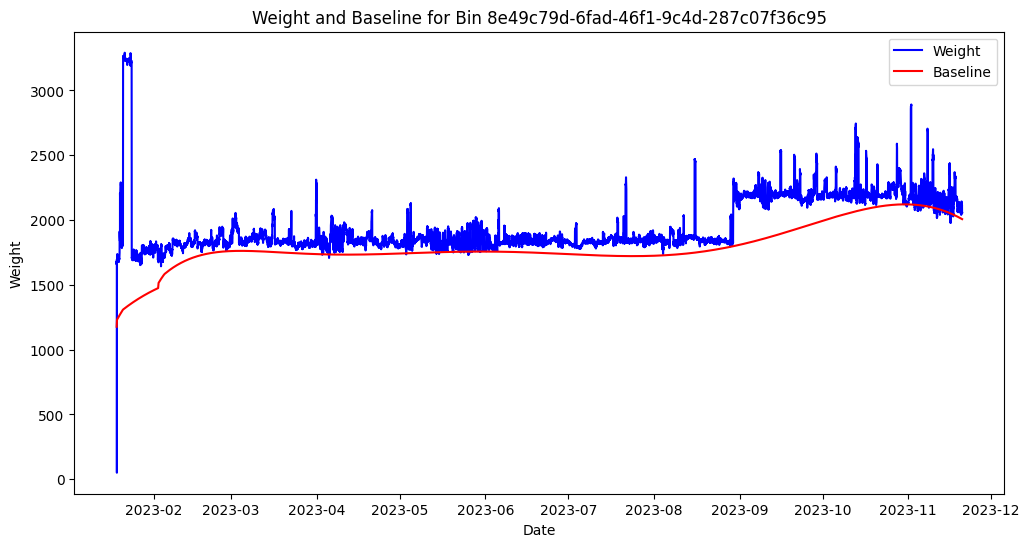

In [42]:
import matplotlib.pyplot as plt
import random

# Replace 'your_bin_id' with the actual ID of the bin you want to plot
#your_bin_id = random.choice(merged_data_filt['bin'].unique())
your_bin_id = '8e49c79d-6fad-46f1-9c4d-287c07f36c95'
# Filter the DataFrame for the specific bin
specific_bin_data = merged_data_filt[merged_data_filt['bin'] == your_bin_id]

# Check if the bin has data to plot
if not specific_bin_data.empty:
    plt.figure(figsize=(12, 6))

    # Plotting weight
    plt.plot(specific_bin_data['createdat'], specific_bin_data['weight'], label='Weight', color='blue')

    # Plotting baseline
    plt.plot(specific_bin_data['createdat'], specific_bin_data['baseline_rolling'], label='Baseline', color='red')

    # Adding title and labels
    plt.title(f'Weight and Baseline for Bin {your_bin_id}')
    plt.xlabel('Date')
    plt.ylabel('Weight')
    plt.legend()

    plt.show()
else:
    print(f"No data available for bin {your_bin_id}")

## TEST

In [53]:
specific_bin_data.head(2)

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day,date,fullness,building,floor,stationName,binName,category,baseline_rolling
498725,2023-01-18 15:05:00,lora-000611,False,8e49c79d-6fad-46f1-9c4d-287c07f36c95,NO_ERROR,1664.759289,3140.611887,2023-01-18 15:05:00,NaN,2023,1,18,NaT,NaN,Center for Computing & Data Sciences,16,CCBU16C,CCBU16CC,Compost,1176.716497
498746,2023-01-18 15:06:00,lora-000611,False,8e49c79d-6fad-46f1-9c4d-287c07f36c95,NO_ERROR,1667.811093,3144.426642,2023-01-18 15:06:00,NaN,2023,1,18,NaT,NaN,Center for Computing & Data Sciences,16,CCBU16C,CCBU16CC,Compost,1177.170373


Changing degree of peakutils

In [173]:
test_bin = merged_data_filt['bin'].iloc[450]
print(test_bin)
test_data = merged_data_filt[(merged_data_filt['bin']==test_bin) & (merged_data_filt['errorcode'] == 'NO_ERROR')]

3bc5fa70-c46e-4217-a5e3-5515d1441637


<Axes: ylabel='weight'>

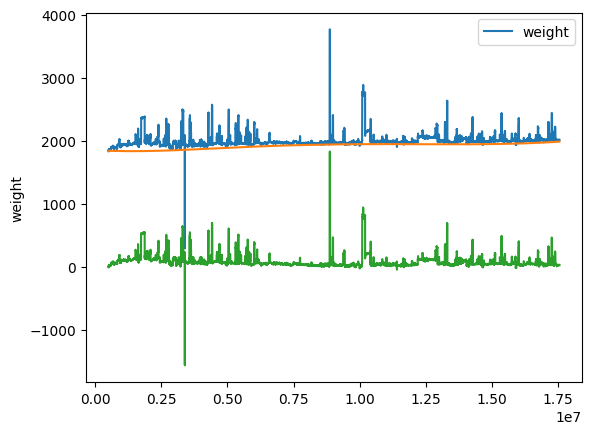

In [160]:
from peakutils import baseline
deg=5
test_data.weight.plot(alpha=1)
bl =  baseline(test_data.weight,deg=deg)
sns.lineplot(y = bl, x=test_data.index)
sns.lineplot(y = (test_data.weight-bl), x=test_data.index)

Outliers

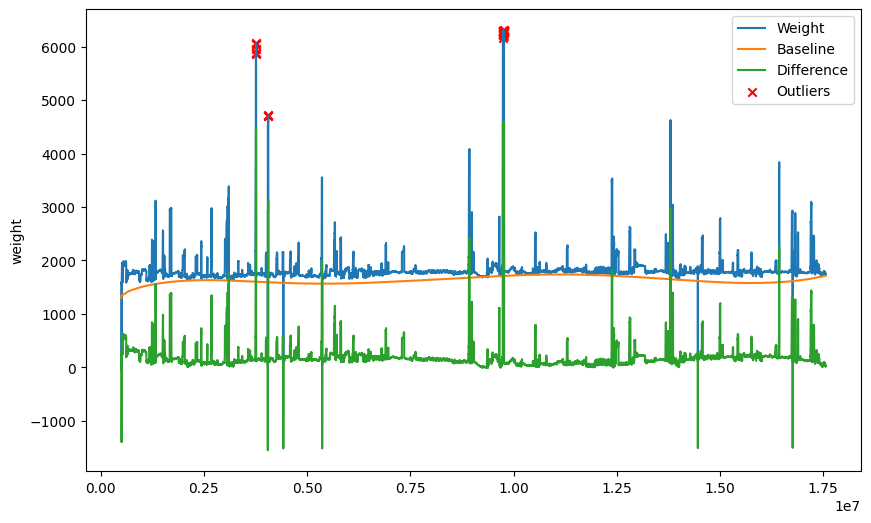

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from peakutils import baseline

# Assuming test_data is a DataFrame with 'weight' column
deg = 5
bl = baseline(test_data.weight, deg=deg)
difference = test_data.weight - bl

# Define a threshold, e.g., based on standard deviation
threshold = np.std(difference) * 10  # Example: 2 standard deviations
outliers = np.abs(difference) > threshold

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=test_data.weight, alpha=1, label='Weight')
sns.lineplot(y=bl, x=test_data.index, label='Baseline')
sns.lineplot(y=(test_data.weight - bl), x=test_data.index, label='Difference')

# Mark outliers
plt.scatter(test_data.index[outliers], test_data.weight[outliers], c='red', marker='x', label='Outliers')

plt.legend()
plt.show()


baseline shift bin example

<Axes: ylabel='weight'>

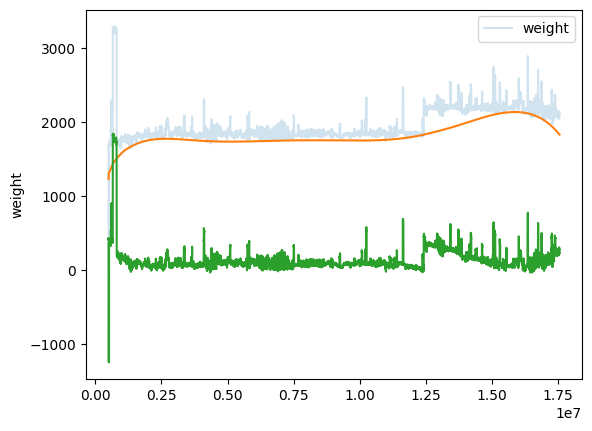

In [150]:
from peakutils import baseline
deg=6
specific_bin_data.weight.plot(alpha=0.2)
bl =  baseline(specific_bin_data.weight,deg=deg)
sns.lineplot(y = bl, x=specific_bin_data.index)
sns.lineplot(y = (specific_bin_data.weight-bl), x=specific_bin_data.index)

In [111]:
scale_records_clean[scale_records_clean['bin']=='ac35373c-9cc0-4223-95a4-e64285725cbf']

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day
206504,2023-01-01 00:01:00,lora-000067,False,ac35373c-9cc0-4223-95a4-e64285725cbf,NO_ERROR,18229.953460,2648.050660,2023-01-01 00:01:00,NaN,2023,1,1
101133,2023-01-01 00:02:00,lora-000067,False,ac35373c-9cc0-4223-95a4-e64285725cbf,NO_ERROR,18229.953460,2648.050660,2023-01-01 00:02:00,NaN,2023,1,1
206505,2023-01-01 00:03:00,lora-000067,False,ac35373c-9cc0-4223-95a4-e64285725cbf,NO_ERROR,18233.005264,2648.050660,2023-01-01 00:03:00,NaN,2023,1,1
101134,2023-01-01 00:04:00,lora-000067,False,ac35373c-9cc0-4223-95a4-e64285725cbf,NO_ERROR,18236.057069,2648.050660,2023-01-01 00:04:00,NaN,2023,1,1
206506,2023-01-01 00:05:00,lora-000067,False,ac35373c-9cc0-4223-95a4-e64285725cbf,NO_ERROR,18236.057069,2648.508431,2023-01-01 00:05:00,NaN,2023,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12599606,2023-05-25 02:54:00,lora-000071,False,ac35373c-9cc0-4223-95a4-e64285725cbf,NO_ERROR,20875.867857,2156.404974,2023-05-25 02:54:00,NaN,2023,5,25
8638570,2023-05-25 03:24:00,lora-000071,False,ac35373c-9cc0-4223-95a4-e64285725cbf,NO_ERROR,20875.867857,2156.404974,2023-05-25 03:24:00,NaN,2023,5,25
6967771,2023-05-25 03:54:00,lora-000071,False,ac35373c-9cc0-4223-95a4-e64285725cbf,NO_ERROR,20875.867857,2156.404974,2023-05-25 03:54:00,NaN,2023,5,25
5080759,2023-06-01 05:52:00,lora-000071,True,ac35373c-9cc0-4223-95a4-e64285725cbf,OUT_OF_RANGE,-1789.883268,3116.807813,2023-06-01 05:52:00,NaN,2023,6,1


## 3.5 Finding the relationship between (weight-baseline) to fullness

In [43]:
merged_data_clean = merged_data_filt.dropna(subset=['fullness'])
merged_data_clean.shape

(2694, 20)

In [44]:
merged_data_clean['weight_minus_baseline'] = merged_data_clean['weight'] - merged_data_clean['baseline_rolling']

In [45]:
merged_data_clean.head(5)

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,...,day,date,fullness,building,floor,stationName,binName,category,baseline_rolling,weight_minus_baseline
13297618,2023-09-13 18:08:00,lora-000266,False,aad2e852-be19-4c52-988f-d030c36c589f,NO_ERROR,1841.763943,2913.862821,2023-09-13 18:08:00,NaN,2023,...,13,2023-09-13 18:19:00,10.0,Center for Computing & Data Sciences,15,CCBU15A,CCBU15AC,Compost,1573.253039,268.510904
13297690,2023-09-13 18:10:00,lora-000354,False,a822a6d7-c052-46ed-a7f5-8d06a6be7ba5,NO_ERROR,2153.047990,2894.178683,2023-09-13 18:10:00,NaN,2023,...,13,2023-09-13 18:25:00,50.0,Center for Computing & Data Sciences,13,CCBU13C,CCBU13CT,Trash,1908.274575,244.773414
13297836,2023-09-13 18:13:00,lora-000278,False,40b01406-13ea-4be3-8dda-849d6ad614e6,NO_ERROR,1847.867552,2864.271000,2023-09-13 18:13:00,NaN,2023,...,13,2023-09-13 18:18:00,10.0,Center for Computing & Data Sciences,16,CCBU16B,CCBU16BC,Compost,1679.943628,167.923924
13297839,2023-09-13 18:13:00,lora-000302,False,602d019f-890c-48c5-8c9f-57cde524bdb5,NO_ERROR,1683.070115,2869.459068,2023-09-13 18:13:00,NaN,2023,...,13,2023-09-13 18:18:00,10.0,Center for Computing & Data Sciences,16,CCBU16B,CCBU16BR,Mixed Recycling,1559.021729,124.048386
13297848,2023-09-13 18:13:00,lora-000436,False,ca255171-3b2f-423b-9bdd-fc2fcd716f1a,NO_ERROR,2336.156252,2562.752728,2023-09-13 18:13:00,NaN,2023,...,13,2023-09-13 18:25:00,20.0,Center for Computing & Data Sciences,13,CCBU13A,CCBU13AR,Mixed Recycling,2170.919749,165.236503


In [46]:
merged_data_clean['weight_minus_baseline'] = merged_data_clean['weight_minus_baseline'].astype(float)

In [47]:
correlation = merged_data_clean['weight_minus_baseline'].corr(merged_data_clean['fullness'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.06673586558229228


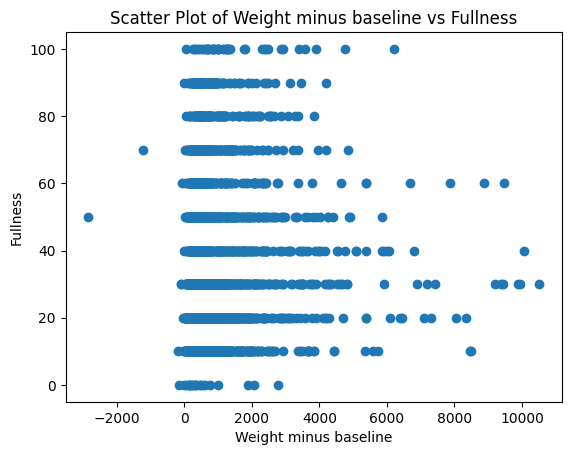

In [48]:
import matplotlib.pyplot as plt

# Scatter plot of weight vs fullness
plt.scatter(merged_data_clean['weight_minus_baseline'], merged_data_clean['fullness'])
plt.xlabel('Weight minus baseline')
plt.ylabel('Fullness')
plt.title('Scatter Plot of Weight minus baseline vs Fullness')
plt.show()

# 4. Bin weight anomaly detection

## 4.1 Data Cleaning

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from tqdm import tqdm
from copy import deepcopy

In [51]:
v5 = pd.read_csv("/Users/charliechou/Downloads/Spare-it V5 scale records Jan 1 to Oct 16 2023-001.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/charliechou/Downloads/Spare-it V5 scale records Jan 1 to Oct 16 2023-001.csv'

In [ ]:
# Drop duplicates
v5.drop_duplicates(inplace=True) 

# Change the type of ‘createdat’ to datetime and create a new column of ‘createdat_ns’
v5['createdat_ns'] = pd.to_datetime(v5["createdat"])

# Drop the rows where the ‘hide’ value is True
v5.drop(v5[v5.hide].index, axis=0, inplace=True)

# Drop unnecessary columns
v5.drop(['createdat','updatedat','year','month','day','errorcode',"hide","weightdiff","battery"], axis=1, inplace=True)

# Group by "bin" and sort by "createdat_ns"
v5 = v5.groupby(by='bin').apply(lambda x: x.sort_values(["createdat_ns"],ascending= True))

# Reset index
v5.reset_index(drop=True,inplace=True)

# Caculate time interval
v5['interval'] = np.nan
same_bin = v5.bin == v5.bin.shift(1)
v5.interval = v5.createdat_ns[same_bin] - v5.createdat_ns.shift(1)[same_bin]

v5.head()

,iotid,bin,weight,createdat_ns,interval
0,lora-001784,002a3bdd-18b3-459f-9377-483249ccf9b6,4588.387884,2023-09-22 17:02:00,NaT
1,lora-001784,002a3bdd-18b3-459f-9377-483249ccf9b6,4588.387884,2023-09-22 17:08:00,0 days 00:06:00
2,lora-001784,002a3bdd-18b3-459f-9377-483249ccf9b6,4585.336080,2023-09-22 17:13:00,0 days 00:05:00
3,lora-001784,002a3bdd-18b3-459f-9377-483249ccf9b6,4588.387884,2023-09-22 17:18:00,0 days 00:05:00
4,lora-001784,002a3bdd-18b3-459f-9377-483249ccf9b6,4585.336080,2023-09-22 17:23:00,0 days 00:05:00


## 4.2 Data Exploration

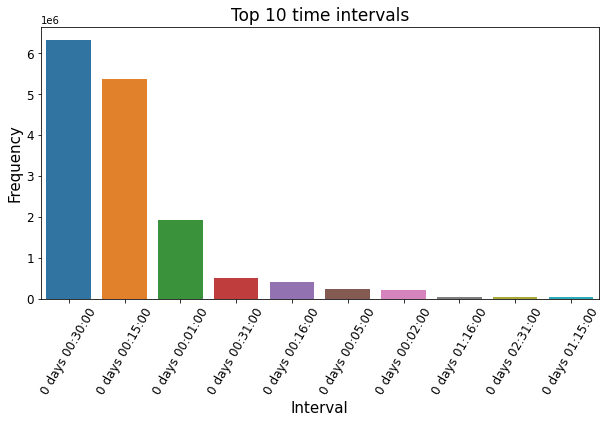

In [ ]:
# Plot the bar chart of the top 10 intervals
interval_counts = v5['interval'].value_counts()
top_intervals = interval_counts.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_intervals.index, y=top_intervals.values)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Interval', fontsize=15)
plt.xticks(fontsize=12, rotation=60)
plt.yticks(fontsize=12)
plt.title("Top 10 time intervals",fontsize=17)
plt.show()

# 30-minute intervals have the highest number of occurrences

In [ ]:
# Create a dictionary to find the relationship between iotid, bin and the number of records
iotid_bin = defaultdict(lambda: defaultdict(int))

for j in tqdm(range(len(v5))):
    iotid_bin[v5.iotid[j]][v5.bin[j]]+=1
    
iotid_bin

# One scale can be used to weigh different bins and one bin can be weighed by different scales.

100%|██████████| 15182180/15182180 [05:27<00:00, 46344.49it/s] 


defaultdict(<function __main__.<lambda>()>,
            {'lora-001784': defaultdict(int,
                         {'002a3bdd-18b3-459f-9377-483249ccf9b6': 1137,
                          '40bc2b26-77ef-4bcc-a2b3-ac8628f67d6c': 6329}),
             'lora-000740': defaultdict(int,
                         {'002e9840-2213-4870-8fe9-7f81f7f23726': 23727,
                          'a7e31415-adee-48ed-8417-8a0a8fc2cc15': 60}),
             'lora-000350': defaultdict(int,
                         {'007099f0-9c71-45d7-a3d0-2f44f83f7f40': 12965}),
             'lora-000131': defaultdict(int,
                         {'00758e5d-6d04-4b4a-b4d8-a203672d8263': 489,
                          '77780108-32f4-4a05-bc91-25ffa067e3d4': 6658,
                          'e64475a1-7788-4745-954f-171b178e7184': 3987}),
             'lora-000241': defaultdict(int,
                         {'00758e5d-6d04-4b4a-b4d8-a203672d8263': 24783,
                          '01d059d1-87b7-4bbb-abc8-072f795465a9': 173}),
  

In [ ]:
# Create a dictionary whose keys are the IDs of scales that weigh multiple bins and whose values are the IDs of the bins
iotid_special = {}
for k, v in iotid_bin.items():
    if len(v)>1:
        iotid_special[k]=list(v.keys())

len(iotid_special)
#There are 172 scales used to weigh more than one bin.

172

## 4.3 Moving Average Method

In [ ]:
v5_1 = deepcopy(v5)

v5_1.index = v5_1.createdat_ns

#Compute moving averages for each bin
v5_1['rolling_weight'] = v5_1.groupby('bin')['weight'].transform(lambda x: x.rolling('2h', min_periods=1).mean())
v5_1['std_dev'] = v5_1.groupby('bin')['rolling_weight'].transform('std')

v5_1.reset_index(drop=True,inplace=True)

#Create confidence bands for anomalies using rolling_weight
v5_1['upper_bound'] = v5_1['rolling_weight'] + 2 * v5_1['std_dev']
v5_1['lower_bound'] = v5_1['rolling_weight'] - 2 * v5_1['std_dev']

v5_1['anomaly_flag'] = (v5_1['weight'] > v5_1['upper_bound']) | (v5_1['weight'] < v5_1['lower_bound'])

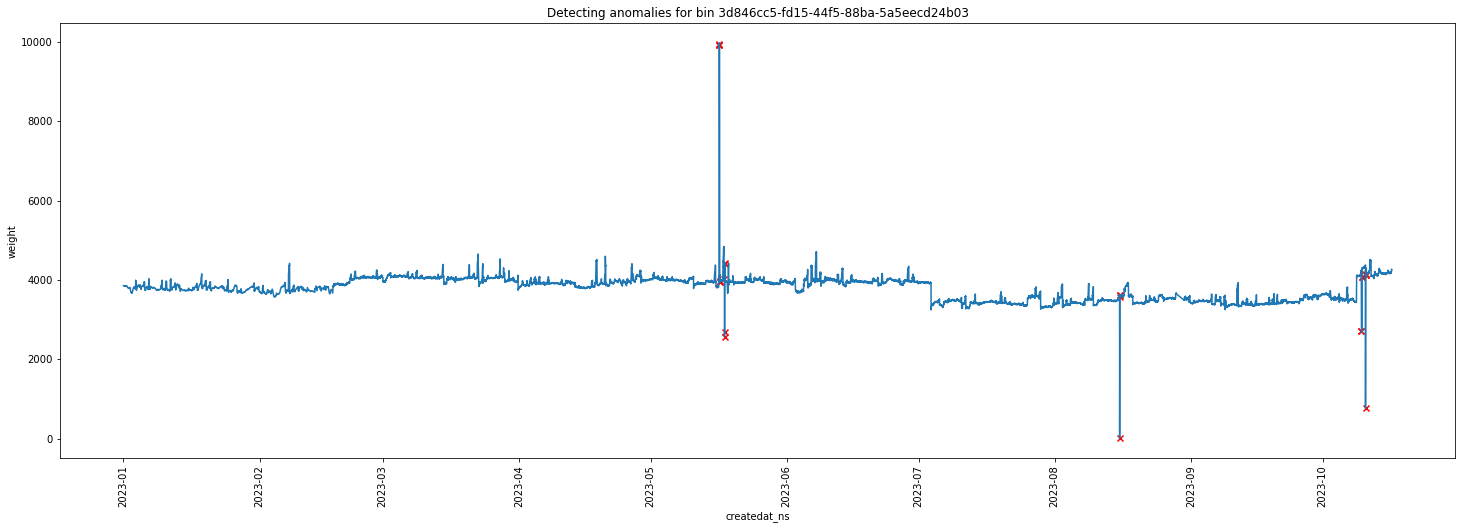

In [ ]:
#Anomalies plot
plt.figure(figsize=(25,8))

anomaly_points = v5_1[(v5_1['bin'] == '3d846cc5-fd15-44f5-88ba-5a5eecd24b03') & v5_1['anomaly_flag']]

sns.lineplot(data=v5_1[v5_1['bin']=='3d846cc5-fd15-44f5-88ba-5a5eecd24b03'],x='createdat_ns',y='weight')
plt.scatter(anomaly_points['createdat_ns'], anomaly_points['weight'], marker='x', color='red', label='Anomaly')
plt.title('Detecting anomalies for bin 3d846cc5-fd15-44f5-88ba-5a5eecd24b03')
plt.xticks(rotation=90)
plt.show()

## 4.4 ARIMA Method

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

#Check ADF score for specific bins (Apply differencing if bin not stationary)

bin1= v5[v5['bin']=='3d846cc5-fd15-44f5-88ba-5a5eecd24b03'].set_index('createdat_ns')

test_result = adfuller(bin1['weight'])
print(f'ADF  {test_result[0]}')
print(f'p-value : {test_result[1]}')

ADF  -3.660123868516457
p-value : 0.004710321609259378


d:\program\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


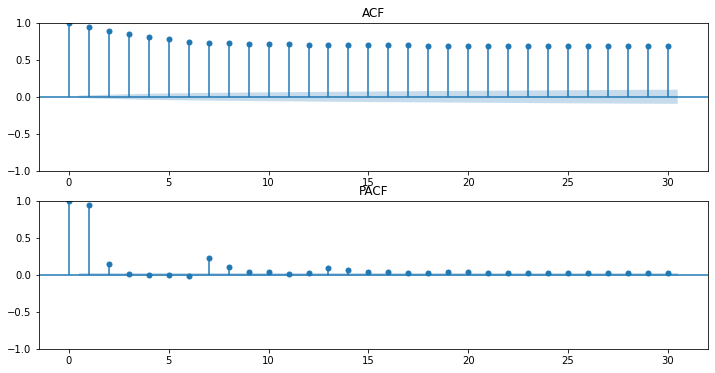

In [ ]:
# Subset data for the specified bin
bin_id = '3d846cc5-fd15-44f5-88ba-5a5eecd24b03'

subset = v5[v5['bin'] == bin_id]
series = subset['weight']

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(series, lags=30, ax=plt.gca(), title='ACF')

plt.subplot(2, 1, 2)
plot_pacf(series, lags=30, ax=plt.gca(), title='PACF')

plt.show()

In [ ]:
# Fit ARIMA model
order = (1, 0, 5)  #Adjust order for different bins
model = ARIMA(subset['weight'], order=order)
fit_model = model.fit()

# Get predictions and residuals
subset['predicted_weight'] = fit_model.predict(start=subset.index.min(), end=subset.index.max(), dynamic=False)
subset['residuals'] = subset['weight'] - subset['predicted_weight']
residual_mean = np.mean(subset['residuals'])


# Set a threshold for anomaly detection 
threshold = residual_mean+2.0 * subset['residuals'].std()

# Identify anomalies based on residuals
subset['anomaly_flag'] = (np.abs(subset['residuals']) > threshold).astype(int)

d:\program\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\program\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\program\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\program\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\15292\AppData\Local\Temp\ipykernel_25204\1234491031.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

<AxesSubplot:xlabel='createdat_ns', ylabel='weight'>

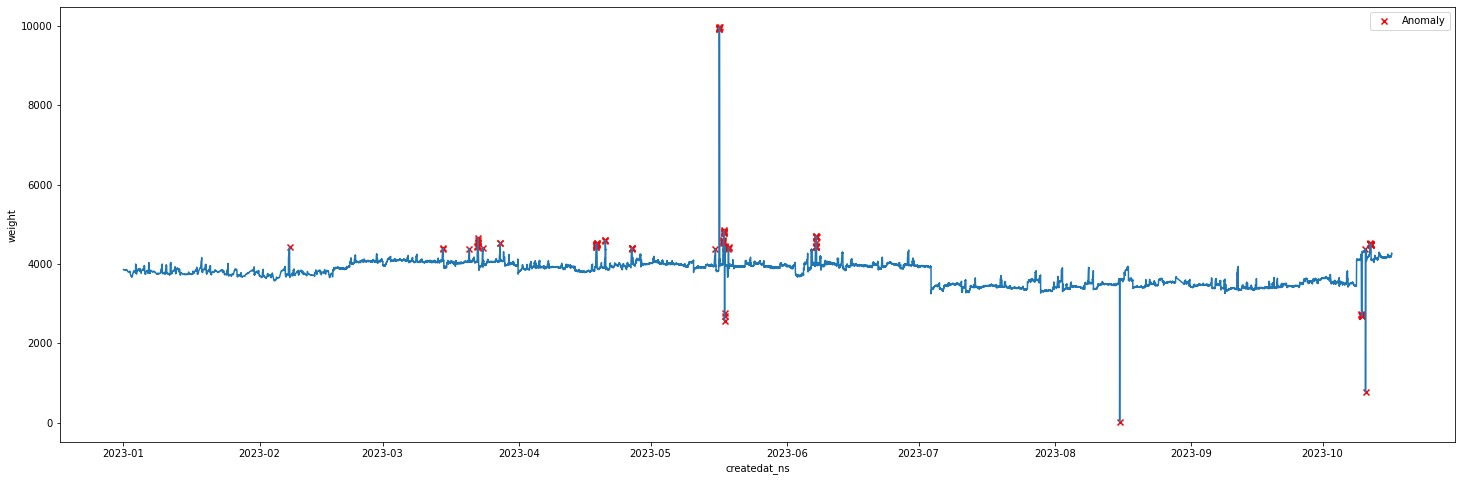

In [ ]:
#Anomalies plot
plt.figure(figsize=(25,8))
anomaly_points = subset[(subset['bin'] == '3d846cc5-fd15-44f5-88ba-5a5eecd24b03') & subset['anomaly_flag']]
plt.scatter(anomaly_points['createdat_ns'], anomaly_points['weight'], marker='x', color='red', label='Anomaly')
sns.lineplot(data=subset,x='createdat_ns',y='weight')

## 4.5 PCA Method

### 4.5.1 Analysis of Data over a One-Month Time Period

In [ ]:
v5_3 = deepcopy(v5)

# Select the records for January 2023
v5_jan = v5_3.loc[(v5_3.createdat_ns<'2023-02-01 00:00:00') & (v5_3.createdat_ns>='2023-01-01 00:00:00')]

v5_jan.reset_index(drop=True,inplace=True)

print(f"In January 2023, there were {len(v5_jan)} records for {len(v5_jan.bin.unique())} bins.")

In January 2023, there were 1137556 records for 698 bins.


To avoid errors caused by filling NaN, we dropped the bins that have few records.

In [ ]:
# Get unique bin IDs and their corresponding counts
bin_id, count = np.unique(v5_jan.bin, return_counts=True)

# Set the threshold for the minimum number of records
n = 2000

# Identify the bins with less than n records
bin_d = bin_id[count<n]
bin_d_ind = v5_jan[v5_jan['bin'].isin(bin_d)].index 

# Drop the bins that have less than n records.
v5_jan.drop(bin_d_ind, axis=0, inplace=True)
v5_jan.reset_index(drop=True,inplace=True)

print(f"There are {len(bin_d)} bins with less than {n} records.")
print(f"These {len(bin_d)} bins have a total of {len(bin_d_ind)} records.")

There are 562 bins with less than 2000 records.
These 562 bins have a total of 583595 records.


C:\Users\15292\AppData\Local\Temp\ipykernel_25204\348347508.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v5_jan.drop(bin_d_ind, axis=0, inplace=True)


Create a dataframe where the index represents the bin IDs and each column represents a timestamp in January 2023. 
The values in the dataframe represent the bin weights at each time point. 
If no record is available for a bin at a specific time, the corresponding cell will have NaN as the value.

In [ ]:
# Get unique time and bin values
bin = v5_jan.bin.unique()
time = sorted(set(v5_jan['createdat_ns']))

# Create a defaultdict to store bin weights for each time point
bin_time = defaultdict(lambda: defaultdict(list))

# Initialize bin_time dictionary with NaN values
for i in bin:
    for j in time:
        bin_time[i][j] = float('nan')

# Fill in bin weights
for i in range(len(v5_jan)):
    bin_time[v5_jan.bin[i]][v5_jan.createdat_ns[i]] = v5_jan.weight[i]

# Convert the bin_time dictionary to a DataFrame, with bin IDs as the index
df = pd.DataFrame.from_dict(bin_time, orient='index')

df.head()

,2023-01-01 00:01:00,2023-01-01 00:02:00,2023-01-01 00:03:00,2023-01-01 00:04:00,2023-01-01 00:05:00,2023-01-01 00:06:00,2023-01-01 00:07:00,2023-01-01 00:08:00,2023-01-01 00:09:00,2023-01-01 00:10:00,...,2023-01-31 23:50:00,2023-01-31 23:51:00,2023-01-31 23:52:00,2023-01-31 23:53:00,2023-01-31 23:54:00,2023-01-31 23:55:00,2023-01-31 23:56:00,2023-01-31 23:57:00,2023-01-31 23:58:00,2023-01-31 23:59:00
00758e5d-6d04-4b4a-b4d8-a203672d8263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
038e82af-4905-49c2-9100-674dd1f9c31a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05569e6c-a11a-4dab-906e-37955e7e9808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1921.110857,NaN,NaN
07fad9d5-a3e3-4a90-a518-b9636db99444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5000.381476,NaN,NaN,NaN,NaN
0853f3e5-5a9e-4171-b8da-78e460255366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1149.004349,NaN,NaN,NaN


In [ ]:
# Fill the NaN values
df_fill = df.interpolate(method='linear',axis=1)
df_fill = df_fill.fillna(method='bfill',axis=1)
df_fill.head()

,2023-01-01 00:01:00,2023-01-01 00:02:00,2023-01-01 00:03:00,2023-01-01 00:04:00,2023-01-01 00:05:00,2023-01-01 00:06:00,2023-01-01 00:07:00,2023-01-01 00:08:00,2023-01-01 00:09:00,2023-01-01 00:10:00,...,2023-01-31 23:50:00,2023-01-31 23:51:00,2023-01-31 23:52:00,2023-01-31 23:53:00,2023-01-31 23:54:00,2023-01-31 23:55:00,2023-01-31 23:56:00,2023-01-31 23:57:00,2023-01-31 23:58:00,2023-01-31 23:59:00
00758e5d-6d04-4b4a-b4d8-a203672d8263,9208.819715,9208.819715,9208.819715,9208.819715,9208.819715,9208.819715,9208.819715,9208.819715,9208.819715,9208.819715,...,35.095750,35.095750,35.095750,35.095750,35.095750,35.095750,35.095750,35.095750,35.095750,35.095750
038e82af-4905-49c2-9100-674dd1f9c31a,111.390860,111.390860,111.390860,111.390860,111.390860,111.390860,111.390860,111.390860,111.390860,111.390860,...,-251.773861,-251.773861,-251.773861,-251.773861,-251.773861,-251.773861,-251.773861,-251.773861,-251.773861,-251.773861
05569e6c-a11a-4dab-906e-37955e7e9808,1884.489204,1884.489204,1884.489204,1884.489204,1884.489204,1884.489204,1884.489204,1884.489204,1884.489204,1884.489204,...,1913.989980,1915.007248,1916.024516,1917.041784,1918.059052,1919.076321,1920.093589,1921.110857,1921.110857,1921.110857
07fad9d5-a3e3-4a90-a518-b9636db99444,90.028229,90.028229,90.028229,90.028229,90.028229,90.028229,90.028229,90.028229,90.028229,90.028229,...,5000.381476,5000.381476,5000.381476,5000.381476,5000.381476,5000.381476,5000.381476,5000.381476,5000.381476,5000.381476
0853f3e5-5a9e-4171-b8da-78e460255366,2217.135882,2217.135882,2217.135882,2217.135882,2217.135882,2217.135882,2217.135882,2217.135882,2217.135882,2217.135882,...,1147.783627,1147.987081,1148.190534,1148.393988,1148.597442,1148.800895,1149.004349,1149.004349,1149.004349,1149.004349


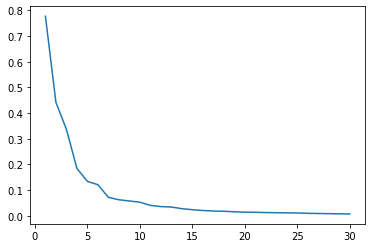

In [ ]:
# Convert dataframe to numpy array
df_fill_v = df_fill.values

# Calculate norm of each bin
norm = np.linalg.norm(df_fill_v, axis=1, ord=1)

# Perform SVD
u,s,vt = np.linalg.svd(df_fill_v ,full_matrices=False)

# Plot the normalized singular values
plt.plot(range(1, 31), s[0:30]/np.linalg.norm(df_fill_v))


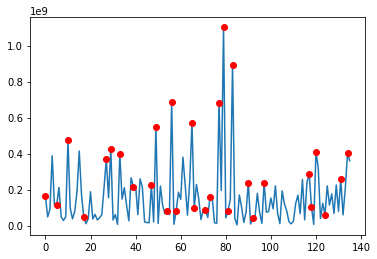

In [ ]:
# choose the top 10 columns of U for the normal space
unorm = u[:,0:9]
P = unorm.dot(unorm.T)
N = P.dot(df_fill)
O = df_fill - N
Onorm = np.linalg.norm(O,axis=1)
# get top 30 anomalies
anomSet = np.argsort(Onorm)[-30:]
plt.plot(norm)
plt.plot(anomSet,norm[anomSet],'ro')

Text(0.5, 0.98, 'Nine Example Anomalous Bins')

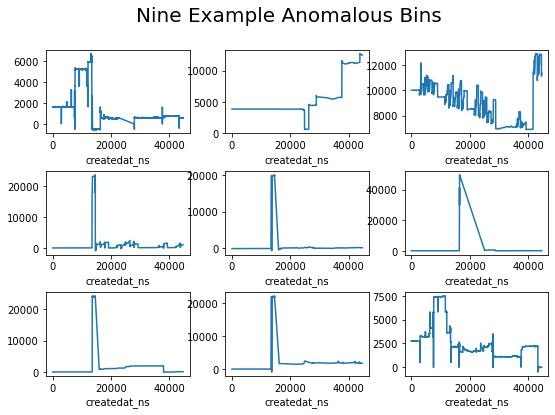

In [ ]:
#sample anomalous
plt.figure(figsize=(9,6))
for i in range(1,10):
    ax = plt.subplot(3,3,i)
    plt.plot(df_fill_v[anomSet[i-1],:])
    plt.xlabel('createdat_ns')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
plt.suptitle('Nine Example Anomalous Bins',size=20)

Text(0.5, 0.98, 'Nine Example Normal Bins')

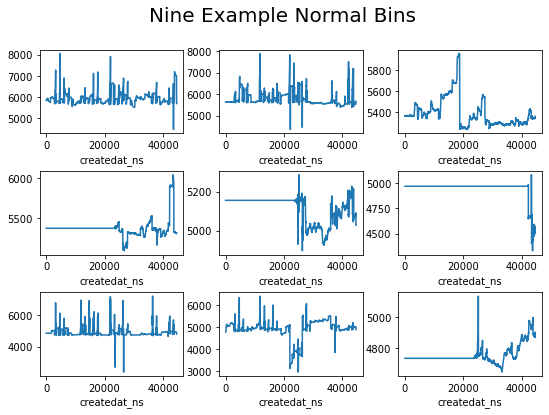

In [ ]:
# choose non-anomalous bins
set = np.argsort(Onorm)[0:70]
# that have high overall volume
max = np.argsort(norm[set])[::-1]
plt.figure(figsize=(9,6))
for i in range(1,10):
    ax = plt.subplot(3,3,i)
    plt.plot(df_fill_v[set[max[i-1]],:])
    plt.xlabel('createdat_ns')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
plt.suptitle('Nine Example Normal Bins',size=20)

### 4.5.2 Analysis of Data over a One-Week Time Period

In [ ]:
v5_4 = deepcopy(v5)

# Select the records for January 2023
v5_week = v5_4.loc[(v5_4.createdat_ns<'2023-01-08 00:00:00') & (v5_4.createdat_ns>='2023-01-01 00:00:00')]

v5_week.reset_index(drop=True,inplace=True)

print(f"In the first week of January 2023, there were {len(v5_week)} records for {len(v5_week.bin.unique())} bins.")

In the first week of January 2023, there were 114591 records for 215 bins.


To avoid errors caused by filling NaN, we dropped the bins that have few records.

In [ ]:
# Get unique bin IDs and their corresponding counts
bin_id, count = np.unique(v5_week.bin, return_counts=True)

# Set the threshold for the minimum number of records
n = 300

# Identify the bins with less than n records
bin_d = bin_id[count<n]
bin_d_ind = v5_week[v5_week['bin'].isin(bin_d)].index 

# Drop the bins that have less than n records.
v5_week.drop(bin_d_ind, axis=0, inplace=True)
v5_week.reset_index(drop=True,inplace=True)

print(f"There are {len(bin_d)} bins with less than {n} records.")
print(f"These {len(bin_d)} bins have a total of {len(bin_d_ind)} records.")

There are 31 bins with less than 300 records.
These 31 bins have a total of 8663 records.


C:\Users\15292\AppData\Local\Temp\ipykernel_10680\2530798061.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v5_week.drop(bin_d_ind, axis=0, inplace=True)


Create a dataframe where the index represents the bin IDs and each column represents a timestamp in January 2023. 
The values in the dataframe represent the bin weights at each time point. 
If no record is available for a bin at a specific time, the corresponding cell will have NaN as the value.

In [ ]:
# Get unique time and bin values
bin = v5_week.bin.unique()
time = sorted(set(v5_week['createdat_ns']))

# Create a defaultdict to store bin weights for each time point
bin_time = defaultdict(lambda: defaultdict(list))

# Initialize bin_time dictionary with NaN values
for i in bin:
    for j in time:
        bin_time[i][j] = float('nan')

# Fill in bin weights
for i in range(len(v5_week)):
    bin_time[v5_week.bin[i]][v5_week.createdat_ns[i]] = v5_week.weight[i]

# Convert the bin_time dictionary to a DataFrame, with bin IDs as the index
df = pd.DataFrame.from_dict(bin_time, orient='index')

df.head()

,2023-01-01 00:01:00,2023-01-01 00:02:00,2023-01-01 00:03:00,2023-01-01 00:04:00,2023-01-01 00:05:00,2023-01-01 00:06:00,2023-01-01 00:07:00,2023-01-01 00:08:00,2023-01-01 00:09:00,2023-01-01 00:10:00,...,2023-01-07 23:50:00,2023-01-07 23:51:00,2023-01-07 23:52:00,2023-01-07 23:53:00,2023-01-07 23:54:00,2023-01-07 23:55:00,2023-01-07 23:56:00,2023-01-07 23:57:00,2023-01-07 23:58:00,2023-01-07 23:59:00
0539a4be-8373-48f5-953b-8dd427d7cc96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2455.176623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05569e6c-a11a-4dab-906e-37955e7e9808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05df844c-5f72-4b89-8107-97b2519f6371,NaN,NaN,8720.531014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8720.531014,NaN,NaN,NaN
089d308d-e797-41af-ae64-b7926136e0d2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09b1ece7-5aaa-4c66-a89a-ac6a99bae6ed,2754.253452,2751.201648,2754.253452,2757.305257,2757.305257,2754.253452,2751.201648,2757.305257,2754.253452,2754.253452,...,7417.410544,NaN,7417.410544,7414.35874,7417.410544,7417.410544,7417.410544,7414.35874,7417.410544,7417.410544


In [ ]:
# Fill the NaN values
df_fill = df.interpolate(method='linear',axis=1)
df_fill = df_fill.fillna(method='bfill',axis=1)
df_fill.head()

,2023-01-01 00:01:00,2023-01-01 00:02:00,2023-01-01 00:03:00,2023-01-01 00:04:00,2023-01-01 00:05:00,2023-01-01 00:06:00,2023-01-01 00:07:00,2023-01-01 00:08:00,2023-01-01 00:09:00,2023-01-01 00:10:00,...,2023-01-07 23:50:00,2023-01-07 23:51:00,2023-01-07 23:52:00,2023-01-07 23:53:00,2023-01-07 23:54:00,2023-01-07 23:55:00,2023-01-07 23:56:00,2023-01-07 23:57:00,2023-01-07 23:58:00,2023-01-07 23:59:00
0539a4be-8373-48f5-953b-8dd427d7cc96,2671.854734,2671.854734,2671.854734,2671.854734,2671.854734,2671.854734,2671.854734,2671.854734,2671.854734,2671.854734,...,2455.176623,2455.176623,2455.176623,2455.176623,2455.176623,2455.176623,2455.176623,2455.176623,2455.176623,2455.176623
05569e6c-a11a-4dab-906e-37955e7e9808,1884.489204,1884.489204,1884.489204,1884.489204,1884.489204,1884.489204,1884.489204,1884.489204,1884.489204,1884.489204,...,1896.696422,1896.696422,1896.696422,1896.696422,1896.696422,1896.696422,1896.696422,1896.696422,1896.696422,1896.696422
05df844c-5f72-4b89-8107-97b2519f6371,8720.531014,8720.531014,8720.531014,8720.531014,8720.531014,8720.531014,8720.531014,8720.531014,8720.531014,8720.531014,...,8721.141375,8721.039648,8720.937921,8720.836194,8720.734468,8720.632741,8720.531014,8720.531014,8720.531014,8720.531014
089d308d-e797-41af-ae64-b7926136e0d2,3562.981613,3562.981613,3562.981613,3562.981613,3562.981613,3562.981613,3562.981613,3562.981613,3562.981613,3562.981613,...,3596.551461,3596.551461,3596.551461,3596.551461,3596.551461,3596.551461,3596.551461,3596.551461,3596.551461,3596.551461
09b1ece7-5aaa-4c66-a89a-ac6a99bae6ed,2754.253452,2751.201648,2754.253452,2757.305257,2757.305257,2754.253452,2751.201648,2757.305257,2754.253452,2754.253452,...,7417.410544,7417.410544,7417.410544,7414.358740,7417.410544,7417.410544,7417.410544,7414.358740,7417.410544,7417.410544


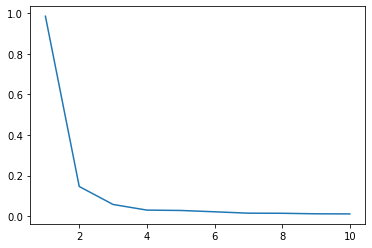

In [ ]:
# Convert dataframe to numpy array
df_fill_v = df_fill.values

# Calculate norm of each bin
norm = np.linalg.norm(df_fill_v, axis=1, ord=1)

# Perform SVD
u,s,vt = np.linalg.svd(df_fill_v ,full_matrices=False)

# Plot the normalized singular values
plt.plot(range(1,11),s[:10]/np.linalg.norm(df_fill_v ))


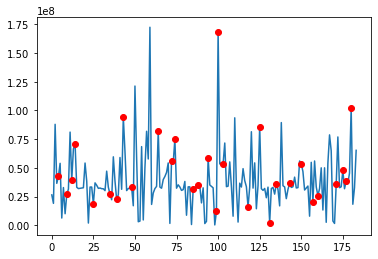

In [ ]:
# choose the top 4 columns of U for the normal space
unorm = u[:,0:3]
P = unorm.dot(unorm.T)
N = P.dot(df_fill)
O = df_fill - N
Onorm = np.linalg.norm(O,axis=1)
# get top 30 anomalies
anomSet = np.argsort(Onorm)[-30:]
plt.plot(norm)
plt.plot(anomSet,norm[anomSet],'ro')

Text(0.5, 0.98, 'Nine Example Anomalous Bins')

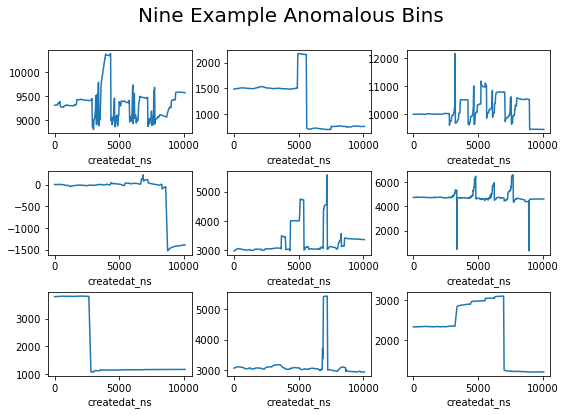

In [ ]:
#sample anomalous
plt.figure(figsize=(9,6))
for i in range(1,10):
    ax = plt.subplot(3,3,i)
    plt.plot(df_fill_v[anomSet[i-1],:])
    plt.xlabel('createdat_ns')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
plt.suptitle('Nine Example Anomalous Bins',size=20)

Text(0.5, 0.98, 'Nine Example Normal Bins')

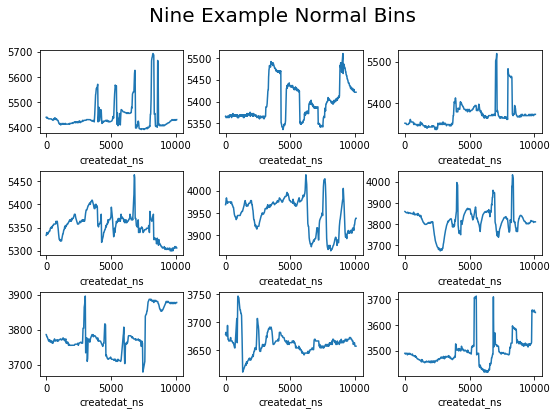

In [ ]:
# choose non-anomalous bins
set = np.argsort(Onorm)[0:80]
# that have high overall volume
max = np.argsort(norm[set])[::-1]
plt.figure(figsize=(9,6))
for i in range(1,10):
    ax = plt.subplot(3,3,i)
    plt.plot(df_fill_v[set[max[i-1]],:])
    plt.xlabel('createdat_ns')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
plt.suptitle('Nine Example Normal Bins',size=20)

# 5. Limitations and Potential Risks

**Task 1: Comparative Analysis of Manual Versus Scale Weight Measurements**

1. **Accuracy of Manual Measurements for fullness measures:** Manual measurements can be highly subjective and prone to human error. Factors like the skill level of the students, their understanding of the measurement process, and physical variations in measuring can introduce significant inaccuracies. This can lead to unreliable data, affecting the overall analysis of waste management effectiveness.

2. **Consistency Across Different Individuals:** Different individuals may have varying perceptions of weight, leading to inconsistencies in manual measurements. Inconsistencies can skew data, making it difficult to establish a reliable baseline for comparison with scale measurements.

3. **Scale Calibration and Maintenance:** Scales require regular calibration and maintenance to ensure accurate readings. Any neglect in this aspect can result in faulty data. Inaccurate scale readings could lead to incorrect conclusions about the effectiveness of waste management strategies.

**Task 2: Noise and Signal Ratio Analysis for Scales**

1. **Technical Challenges in Signal Processing:** Analyzing noise levels in weight measurements requires sophisticated signal processing techniques, which can be technically challenging.Inadequate analysis might result in overlooking subtle noise characteristics, affecting the accuracy of the findings.

2. **Scale Variation:** Variations in scale models, manufacturing standards, and age can lead to differences in measurement accuracy. This variability could complicate the analysis, making it hard to generalize findings across all scales.

3. **Impact of Environmental Vibrations:** External environmental factors, such as vibrations,  or electrical interference, can affect scale readings. Failing to account for these factors can lead to misinterpretation of the noise levels as intrinsic to the scales themselves.

4. **Physical Interactions with Scales:** Accidental physical interactions, such as students inadvertently stepping on scales, can lead to sudden spikes or anomalies in the data. These instances can significantly skew the average measurements and introduce outliers


**In conclusion, while both tasks offer valuable insights into waste management practices, it's crucial to be aware of these limitations and risks to ensure accurate, reliable, and ethical use of the data.**